In [1]:
import datetime as dt
import pandas as pd
import statistics as st

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01'
end = '2020-12-31'

symbol = 'AMD'

In [3]:
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,93.080002,93.129997,91.459999,91.550003,91.550003,25993300
2020-12-24,91.800003,92.510002,91.309998,91.809998,91.809998,16705900
2020-12-28,92.930000,93.139999,90.820000,91.599998,91.599998,30627300
2020-12-29,91.660004,92.459999,89.430000,90.620003,90.620003,31748200
2020-12-30,90.779999,92.849998,90.190002,92.290001,92.290001,25845000


In [6]:
monthly = df.copy()

In [7]:
monthly.set_index(monthly.index, inplace=True)
monthly.index = pd.to_datetime(monthly.index)
monthly = monthly.resample('M').mean()

In [8]:
data = monthly['Adj Close']
data

Date
2020-01-31    49.197142
2020-02-29    51.376842
2020-03-31    44.424091
2020-04-30    52.063810
2020-05-31    53.503000
2020-06-30    53.490000
2020-07-31    60.225000
2020-08-31    83.419999
2020-09-30    79.777620
2020-10-31    82.210454
2020-11-30    83.196000
2020-12-31    93.267619
Freq: M, Name: Adj Close, dtype: float64

In [9]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Jul', 'Aug', 'Sep', 'Oct', 'Sep', 'Nov', 'Dec']

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

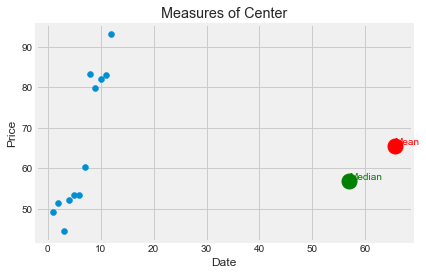

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.set_title("Measures of Center")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

ax.scatter([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], data)

ax.plot([st.mean(data)], [st.mean(data)], color='r', marker="o", markersize=15)
ax.plot([st.median(data)], [st.median(data)], color='g', marker="o", markersize=15)
#ax.plot([st.mode(data)], [st.mode(data)], color='k', marker="o", markersize=15)

plt.annotate("Mean", (st.mean(data), st.mean(data)+0.3), color='r')
plt.annotate("Median", (st.median(data), st.median(data)+0.3), color='g')
#plt.annotate("Mode", (st.mode(data), st.mode(data)+0.3), color='k')
plt.show()